In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import sys
import pylab
sys.path.insert(0, '../DLITE/')
from Lloyd_relaxation_class import Atlas

P = np.random.random((6000,2))


In [2]:
gg = Atlas(points = P, dimensions = (6000,2))

# Generate Voronoi dataset

In [3]:
vor = gg.generate_voronoi()

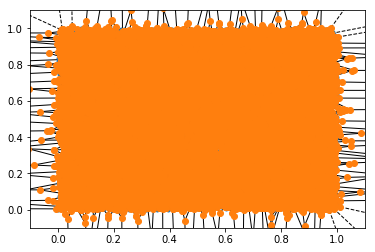

In [4]:
fig = voronoi_plot_2d(vor)

# Use Lloyd relaxation

This will make Voronoi cells roughly equal in size

In [5]:
vor2 = gg.relax_points(times = 182)

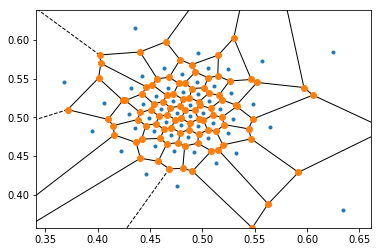

In [6]:
fig = voronoi_plot_2d(vor2)

In [7]:
vor = vor2

# Save file in Surface Evolver format

First, lets choose a name for the file

In [8]:
file = 'test_automated_2.fe'

File header is space dimension 2 and STRING model

In [9]:
with open(file, 'a') as f:
    f.write('STRING' + '\n')
    f.write('space_dimension' + ' ' + '2' + '\n' + '\n')
    f.write('vertices' + '\n')

Lets get a list of vertices and add it to the text file

In [10]:
# fig, ax  = plt.subplots(1,1,figsize = (8,5))
# counts = [6, 1, 0, 3]
import pandas as pd

vertices_data = {'label': [], 'x': [], 'y': []}
count = 0
for j, a in enumerate(vor.vertices):
#     if a[0] > 0.1 and a[0] < 0.9 and a[1] < 0.9 and a[1] > 0.1:
    
    if count != 0:
        with open(file, 'a') as f:
            #print(count , a[0]*1000, a[1]*1000 )
            xx = []
            xx.append(str(count))
            xx.append(str(a[0]*1000))
            xx.append(str(a[1]*1000))
            this_row = ' '.join(str(x) for x in xx)
            #print(this_row)
            f.write(this_row + '\n')   
        vertices_data['label'].append(count )
        vertices_data['x'].append(a[0])
        vertices_data['y'].append(a[1])
    count += 1
#     if j in counts:
#         ax.plot(a[0], a[1], 'ok')
#     else:
#         ax.plot(a[0], a[1], '.')
# voronoi_plot_2d(vor)  
# plt.show()
vertices_dataframe = pd.DataFrame(vertices_data)
vertices_dataframe.set_index(['label'], inplace = True)

Now, we do the same for edges

In [11]:
with open(file, 'a') as f:
    f.write('\n' + 'edges' + '\n')

In [12]:
edges_data = {'label': [], 'v1': [], 'v2': []}
count = 1
ridge_vertices = []
for a in vor.ridge_vertices:
    if a[0] > 0 and a[1] > 0:
        with open(file, 'a') as f:
            #print(count ,a[0] , a[1])
            xx = []
            xx.append(str(count))
            xx.append(str(a[0]))
            xx.append(str(a[1]))
            this_row = ' '.join(str(x) for x in xx)
            #print(this_row)
            f.write(this_row + '\n')  
        edges_data['label'].append(count)
        edges_data['v1'].append(a[0] )
        edges_data['v2'].append(a[1])
        ridge_vertices.append(np.array([a[0], a[1]]))
        count += 1
edges_dataframe = pd.DataFrame(edges_data)
edges_dataframe.set_index(['label'], inplace = True)

In [13]:
all_edges_list = []
for i in vor.regions:
    if all([a > 0for a in i ]) and len(i) != 0:
#         print(i)

        edge_list = []
        #print(i)
        for ff in range(len(i)):
            
#             print(count)
            try:
                p1 = i[ff]
                p2 = i[ff + 1]
                #print(p1 + 1, p2 + 1)
                count = 0
                for jj, j in enumerate(ridge_vertices):
                    count += 1
    #                 print(j)
                    if j[0] == p1 and j[1] == p2:
                        #print('yes')
                        #print('j',j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(count)
                        else:
                            edge_list.append(count)

                    elif j[1] == p1 and j[0] == p2:
                        #print('yes')
                        #print('j', j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(-count)
                        else:
                            edge_list.append(-count)

            except:
                p1 = i[ff]
                p2 = i[0]
                #print(p1 + 1, p2 + 1)
                count = 0
                for jj, j in enumerate(ridge_vertices):
                    count += 1
    #                 print(j)
                    if j[0] == p1 and j[1] == p2:
                        #print('yes')
                        #print('j',j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(count)
                        else:
                            edge_list.append(count)

                    elif j[1] == p1 and j[0] == p2:
                        #print('yes')
                        #print('j', j, jj + 1, count)
                        if len(edge_list) == 0:
                            edge_list.append(-count)
                        else:
                            edge_list.append(-count)
                
            #print(edge_list)
            
        

        all_edges_list.append(edge_list)

Now the same for faces

In [14]:
with open(file, 'a') as f:
    f.write('\n' + 'faces' + '\n')

In [15]:
all_area = []
all_points = []
for j, i in enumerate(all_edges_list):
    with open(file, 'a') as f:
        f.write(str(j + 1) + ' ')
        #print(j + 1, end = " ")
    tot_area = 0
    points = []
    for k, ii in enumerate(i):
        if ii > 0:
            v1 = edges_dataframe.at[ii, 'v1']
            v2 = edges_dataframe.at[ii, 'v2']
            x1, y1 = vertices_dataframe.at[v1, 'x'], vertices_dataframe.at[v1, 'y']
            x2, y2 = vertices_dataframe.at[v2, 'x'], vertices_dataframe.at[v2, 'y']
            area = -(x2 - x1) /(y2 + y1)  
            with open(file, 'a') as f:
                f.write(str(ii) + ' ')
                #print(ii , end = " ")
            if k ==0:
                points.append(v1)
                points.append(v2)
            else:
                if v1 not in points:
                    points.append(v1)
                elif v2 not in points:
                    points.append(v2)
#             print('test',ii, v1, v2)
        else:
            v2 = edges_dataframe.at[-ii, 'v1']
            v1 = edges_dataframe.at[-ii, 'v2']
            x1, y1 = vertices_dataframe.at[v1, 'x'], vertices_dataframe.at[v1, 'y']
            x2, y2 = vertices_dataframe.at[v2, 'x'], vertices_dataframe.at[v2, 'y']
            area = -(x2 - x1) /(y2 + y1) 
            
            with open(file, 'a') as f:
                f.write(str(ii) + ' ')
                #print(ii , end = " ")
            if k ==0:
                points.append(v1)
                points.append(v2)
            else:
                if v1 not in points:
                    points.append(v1)
                elif v2 not in points:
                    points.append(v2)
#             print('test',ii, v1, v2)
            
    
        tot_area = tot_area + area
    with open(file, 'a') as f:
        f.write('\n')
        #print('')
    
#     print(tot_area)
    all_area.append(tot_area)
    all_points.append(points)

Finally for bodies

In [16]:
with open(file, 'a') as f:
    f.write('\n' + 'bodies' + '\n')

In [17]:
for j, i in enumerate(range(len(all_edges_list))):
    with open(file, 'a') as f:
        f.write(str(i+1) + ' ' + str(i + 1) + '\n')
        #print(i + 1, (i + 1))


This marks the end of the input geometry. Next, we specify some SE functions that we can run from the command line

In [18]:
with open(file, 'a') as f:
    f.write('\n' + 'read' + '\n' + '\n' + 'gogo := { g 2;' + '\n' 
           + '      o;' + '\n' + 
            '      g 5;'+ '\n' +
            '      r;' + '\n'
            + '      g 20;' + '\n' +
            '      r;' + '\n' + 
            '      g 20;' + '\n' + 
           '      V 3;' + '\n'  + 
           '      r;' + '\n'  + 
           '      g 20;' + '\n'  +
           '      };' + '\n' + '\n' )

We can also choose to modify the tension of certain edges

In [19]:
import numpy as np

numbers = np.linspace(50,120, 71)
numbers = [int(i) for i in numbers]
tension = 0.8
num = tension


In [20]:
with open(file, 'a') as f:
    #print('\n' + 'gogo3 := {set edge tension %.2f where id == %d; \n' % (tension, numbers[0]), end = ''  ) 
    f.write('gogo3 := {set edge tension %.2f where id == %d;' % (tension, numbers[0]) + '\n')
for j, i in enumerate(numbers):
    if j > 0:
        with open(file, 'a') as f:
            #print('      set edge tension %.2f where id == %d; \n' % (tension, i), end = '')
            f.write('      set edge tension %.2f where id == %d;' % (tension, i) + '\n')

with open(file, 'a') as f:
    #print('      gogo; \n', end = '')
    f.write('      gogo;' + '\n')
    #print('      dump "test_automated_%.1f.fe.txt"; \n'% num, end = '')
    f.write('      dump "test_automated_2_%.1f.fe.txt";'% num + '\n')
    #print('      }')
    f.write('      }')

To run in SE, first you will have to copy to fe folder - so cp test_automated.fe /Evolver270-OSX/fe on a mac

Then, it is ready to load in Surface Evolver. Run evolver test_automated.fe followed by gogo3

If you want to delete the file and run this notebook again, use this

In [22]:
os.remove("test_automated.fe")